# Bi-variate Methods

In [1]:
from py_files.poly_dictionary import decompose_polynomial
from py_files.Polynomial import *

Session polynomials can be edited here. These have been chosen as are linear and easily soluble with pencil and paper

In [3]:
poly1 = decompose_polynomial("+x^2*y +x*y^2-3*x*y")
poly2 = decompose_polynomial("x^2 +y^2 +x*y +2*x -y -2")
poly3 = decompose_polynomial("3*x^2 +2*y^2 -4*x*y +4*x -8*y")
poly4 = decompose_polynomial("3*x^2*y^3 - 9*x^2*y +x^3 - 15*x -50")

----
&nbsp;
## Plotting a surface

#### Definition
&nbsp;
A function of two variables is a function $f$ whose domain is $\mathbb{R}^2$ (or a subset of $\mathbb{R}^2$) and whose codomain is $\mathbb{R}$. Thus for each point ($x$, $y$) in the domain of $f$, there is a unique value $z$ defined by $z = f(x,y)$.

The set of all points with coordinates $(x, y, z)$ = $(x, y, f (x, y))$, plotted in a three-dimensional Cartesian coordinate system, is the surface with equation $z = f (x, y)$.

In [4]:
# Define Instances
p1 = BiVarPoly(poly1)
p2 = BiVarPoly(poly2)
p3 = BiVarPoly(poly3)
p4 = BiVarPoly(poly4)

In [5]:
# Define SymPy instances
symp1 = p1.save_as_sympy(rational=True)
symp2 = p2.save_as_sympy(rational=True)
symp3 = p3.save_as_sympy(rational=True)
symp4 = p4.save_as_sympy(rational=True)

----
&nbsp;
## We can adjust the `x_range` and `y_range` below

In [6]:
# Adjust globally or redefine
x_range = (-10, 10)
y_range = (-10, 10)

----
&nbsp;
### `plot()` method takes `plot_type=` arguments; (default), `'surface'`, `'wireframe'` and `'contour'`

In [7]:
p1.display()

Poly(x**2*y + x*y**2 - 3*x*y, x, y, domain='ZZ')

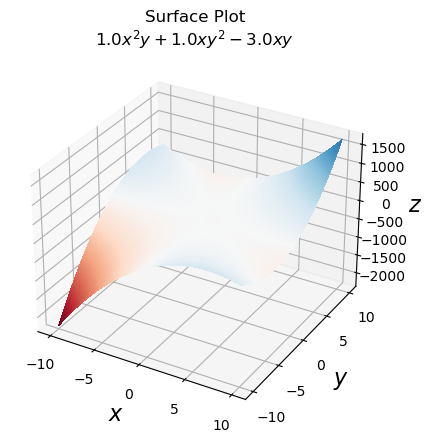

In [8]:
p1.plot(x_range=x_range, y_range=y_range)

In [9]:
p2.display()

Poly(x**2 + x*y + 2*x + y**2 - y - 2, x, y, domain='ZZ')

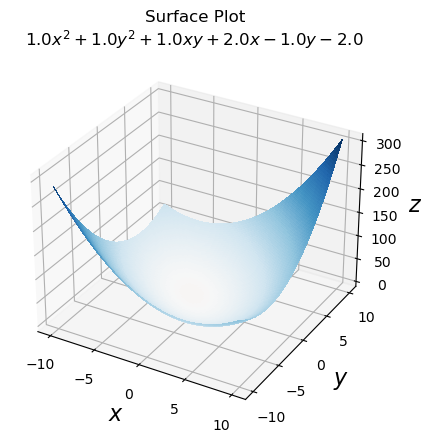

In [10]:
p2.plot(x_range=x_range, y_range=y_range)

Good candidate for contour plot

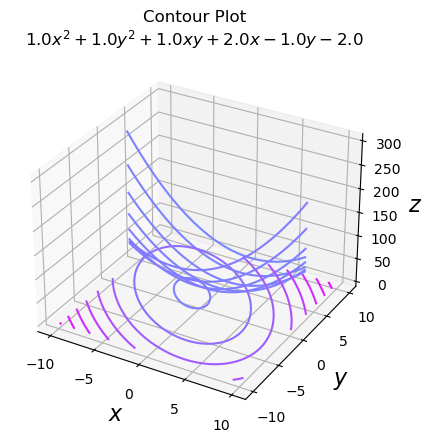

In [11]:
p2.plot(x_range=x_range, y_range=y_range, plot_type='contour')

In [12]:
p3.display()

Poly(3*x**2 - 4*x*y + 4*x + 2*y**2 - 8*y, x, y, domain='ZZ')

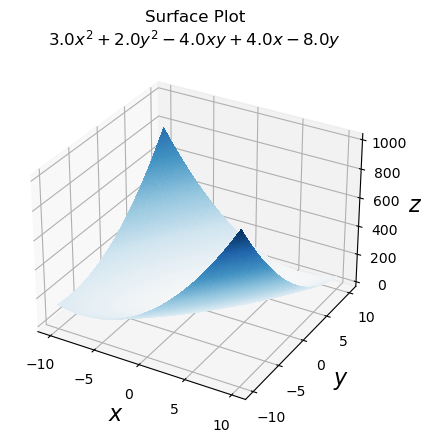

In [13]:
p3.plot(x_range=x_range, y_range=y_range)

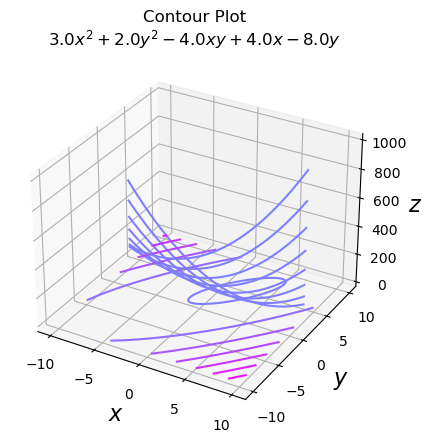

In [14]:
p3.plot(x_range=x_range, y_range=y_range, plot_type='contour')

In [15]:
p4.display()

Poly(x**3 + 3*x**2*y**3 - 9*x**2*y - 15*x - 50, x, y, domain='ZZ')

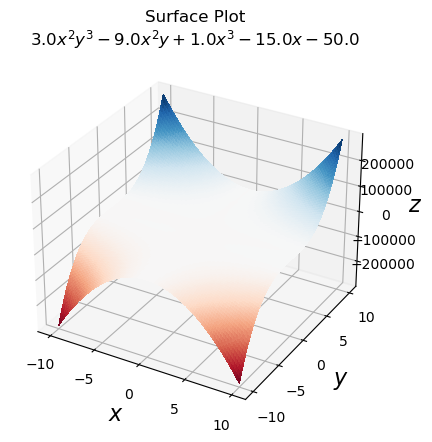

In [16]:
p4.plot(x_range=x_range, y_range=y_range)

----
&nbsp;
## Finding stationary points/extrema

Definition
&nbsp;
A **stationary point** of a function $f(x,y)$ is a point $(a,b)$ in the domain of $f(x,y)$ at which $f_x(a,b) = f_y(a,b) = 0$.
The corresponding point $(a, b, f (a, b))$ on the surface $S$ defined by $z = f(x,y)$ is a stationary point on $S$.


In [17]:
display(symp1.args[0])
sp1 = p1.find_stationary_points(rational=True)
print(sp1)

x**2*y + x*y**2 - 3*x*y

[(0, 0), (0, 3), (1, 1), (3, 0)]


In [18]:
display(symp2.args[0])
sp2 = p2.find_stationary_points(rational=True)
print(sp2)

x**2 + x*y + 2*x + y**2 - y - 2

[(-5/3, 4/3)]


In [19]:
display(symp3.args[0])
sp3 = p3.find_stationary_points(rational=True)
print(sp3)

3*x**2 - 4*x*y + 4*x + 2*y**2 - 8*y

[(2, 4)]


In [20]:
display(symp4.args[0])
sp4 = p4.find_stationary_points(rational=True)
print(sp4)

x**3 + 3*x**2*y**3 - 9*x**2*y - 15*x - 50

[(-5, -1), (-1, 1), (1, -1), (5, 1)]


----
&nbsp;
## Creating a `Hessian` Matrix.

In [21]:
p1.display()
H1 = p1.Hessian(as_rational=True)
H1

Poly(x**2*y + x*y**2 - 3*x*y, x, y, domain='ZZ')

Matrix([
[          2*y, 2*x + 2*y - 3],
[2*x + 2*y - 3,           2*x]])

In [22]:
print(type(H1))

<class 'sympy.matrices.dense.MutableDenseMatrix'>


In [23]:
p2.display()
H2 = p2.Hessian(as_rational=True)
H2

Poly(x**2 + x*y + 2*x + y**2 - y - 2, x, y, domain='ZZ')

Matrix([
[2, 1],
[1, 2]])

In [24]:
p3.display()
H3 = p3.Hessian(as_rational=True)
H3

Poly(3*x**2 - 4*x*y + 4*x + 2*y**2 - 8*y, x, y, domain='ZZ')

Matrix([
[ 6, -4],
[-4,  4]])

In [25]:
p4.display()
H4 = p4.Hessian(as_rational=True)
H4

Poly(x**3 + 3*x**2*y**3 - 9*x**2*y - 15*x - 50, x, y, domain='ZZ')

Matrix([
[6*x + 6*y**3 - 18*y, 18*x*y**2 - 18*x],
[   18*x*y**2 - 18*x,        18*x**2*y]])

----
## Classifying the stationary points
&nbsp;
The Hessian Matrix is given,

$$
\textbf{H} =
\begin{bmatrix}
f_{xx} & f_{xy} \\
f_{yx} & f_{yy}
\end{bmatrix}
$$

For most well-behaved functions, $f_{xy} = f_{yx}$ by the symmetry of second derivatives. Therefore,

$$
\mathrm{det}(\textbf{H}) = f_{xx}f_{yy} - f_{xy}^2
$$

Given that the (sufficiently smooth) function $f(x,y)$ has a stationary point at $(a,b)$
&nbsp;
- If $f_{xx}f_{yy} - (f_{xy})^2 > 0$, there is:
  - a local minimum at $(a, b)$ if $f_{xx} > 0$
  - a local maximum at $(a, b)$ if $f_{xx} < 0$.
- If $f_{xx}f_{yy} - (f_{xy})^2 < 0$, there is a saddle point at $(a, b)$.
- If $f_{xx}f_{yy} - (f_{xy})^2 = 0$, the test is unable to classify the stationary point.

In [26]:
p1.classify_points(sp1, as_rational=True)

-----------------
Substituting (0, 0) into the Hessian matrix:


Matrix([
[ 0, -3],
[-3,  0]])

(0, 0) is a Saddle point by the determinant test.
-----------------
Substituting (0, 3) into the Hessian matrix:


Matrix([
[6, 3],
[3, 0]])

(0, 3) is a Saddle point by the determinant test.
-----------------
Substituting (1, 1) into the Hessian matrix:


Matrix([
[2, 1],
[1, 2]])

(1, 1) is a Local minimum by the determinant test.
-----------------
Substituting (3, 0) into the Hessian matrix:


Matrix([
[0, 3],
[3, 6]])

(3, 0) is a Saddle point by the determinant test.


{(0, 0): 'Saddle point',
 (0, 3): 'Saddle point',
 (1, 1): 'Local minimum',
 (3, 0): 'Saddle point'}

In [27]:
p2.classify_points(sp2, as_rational=True)

The Hessian matrix is constant and its determinant is 3.
(-5/3, 4/3) is a Local minimum by the determinant test.


Matrix([
[2, 1],
[1, 2]])

{(-5/3, 4/3): 'Local minimum'}

In [28]:
p3.classify_points(sp3, as_rational=True)

The Hessian matrix is constant and its determinant is 8.
(2, 4) is a Local minimum by the determinant test.


Matrix([
[ 6, -4],
[-4,  4]])

{(2, 4): 'Local minimum'}

## We can also classify a `BiVarPoly` instance without explicitly creating a list of stationary points

In [29]:
p4.classify_points(as_rational=True)

Stationary Points:
[(-5, -1), (-1, 1), (1, -1), (5, 1)]
-----------------
Substituting (-5, -1) into the Hessian matrix:


Matrix([
[-18,    0],
[  0, -450]])

(-5, -1) is a Local maximum by the determinant test.
-----------------
Substituting (-1, 1) into the Hessian matrix:


Matrix([
[-18,  0],
[  0, 18]])

(-1, 1) is a Saddle point by the determinant test.
-----------------
Substituting (1, -1) into the Hessian matrix:


Matrix([
[18,   0],
[ 0, -18]])

(1, -1) is a Saddle point by the determinant test.
-----------------
Substituting (5, 1) into the Hessian matrix:


Matrix([
[18,   0],
[ 0, 450]])

(5, 1) is a Local minimum by the determinant test.


{(-5, -1): 'Local maximum',
 (-1, 1): 'Saddle point',
 (1, -1): 'Saddle point',
 (5, 1): 'Local minimum'}

----
&nbsp;
## Gradient Vector
&nbsp;
$
\nabla\ f(a, b) = f_x(a, b)\textbf{i} + f_y(a, b)\textbf{j}
$

The gradient of the function $f(x,y)$ at the point $(a,b)$ is a (vector) function of two variables.


In [30]:
# Calculate the symbolic gradient vector
p4.gradient(rational=True)

Matrix([
[3*x**2 + 6*x*y**3 - 18*x*y - 15],
[           9*x**2*y**2 - 9*x**2]])

In [32]:
# evaluate at some point
p4.gradient((5, 1), rational=True)

Matrix([
[0],
[0]])